In [50]:
import pandas as pd
import datetime
import seaborn as sns
import folium

In [51]:
# get the data from the API and turn it into a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

### New Cases
The following graph shows the evolution of new COVID cases by million over time by continents. I chose a line diagram, because it enables the viewer to compare different contintents and their respective course of new cases. Some data may not be accurate, because it is unprobable that there were so little cases in Africa. This is probably due to missing data.

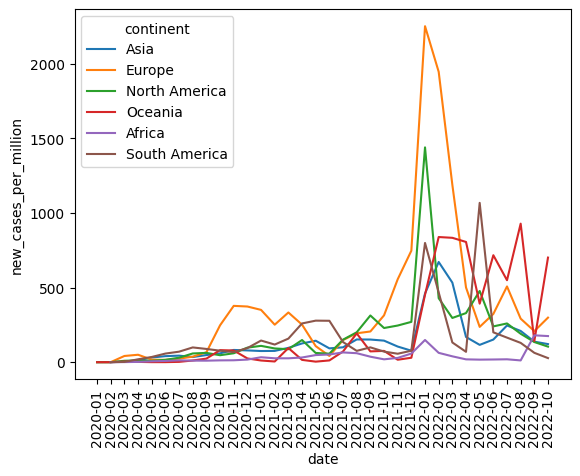

In [52]:

df['date'] = pd.to_datetime(df['date']).map(lambda x: x.strftime('%Y-%m'))

means = df.groupby(['date', 'continent'])['new_cases_per_million'].mean()
new_cases = pd.DataFrame(means)

new_cases.dropna(inplace=True)
ax = sns.lineplot(data=new_cases, x='date', y='new_cases_per_million', hue='continent')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
print('')

### Test Strategies
The following barplot can help to understand different test strategies throughout Europe, as shown by the total tests per thousand by country. This kind of representation was chosen because for my inquiry it is not necessary to show development over time and a lot of different values (tests by country in Europe) can be compared.

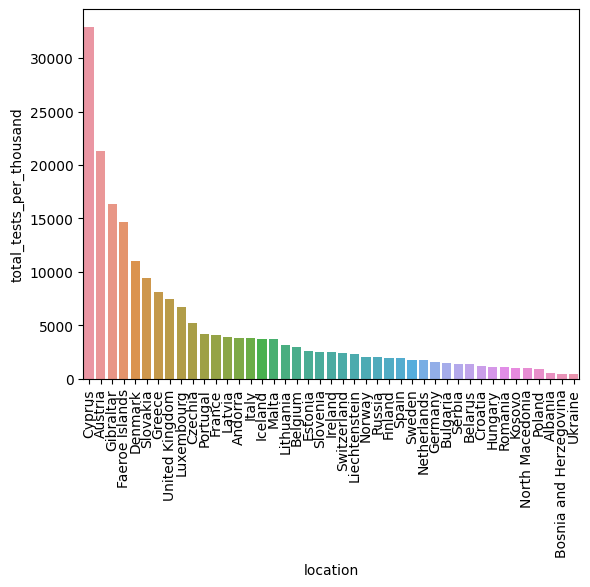

In [53]:
cases = pd.DataFrame(df[df.continent == 'Europe'].groupby(['location'])['total_tests_per_thousand'].last())

cases.dropna(inplace=True)
cases['location'] = cases.index

ax = sns.barplot(data=cases, y='total_tests_per_thousand', x='location', order=cases.sort_values('total_tests_per_thousand', ascending=False).location)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
print('')

### COVID Deaths
The following world map shows the total deaths per million per country. The last value for each country was chosen, because the nature of the variable is cumulative, so it is not necessary to take all its values into account. This visualization is helpful to understand how death rate in different countries differs.

In [54]:

world = f'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
vaccinations = df.groupby('iso_code')['total_deaths_per_million'].last().to_frame('total_deaths_per_million')
vaccinations.reset_index(inplace = True, drop = False)

map = folium.Map(location=[50,0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=vaccinations,
    columns=['iso_code', 'total_deaths_per_million'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Deaths per Million'
).add_to(map)

folium.LayerControl().add_to(m)

map

### Poverty and Vaccination Rates
The following plot aims to illustrate the relationship between poverty of a country and the percentage of people who are fully vaccinated. It becomes apparent that whereas the amount of vaccinated people greatly differs for countries who do not suffer extreme poverty. However, for those who do, vaccination rates on average are rather low.

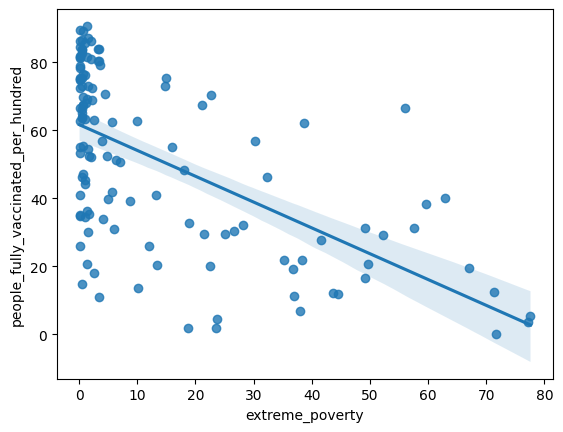

In [55]:
poverty = pd.DataFrame(df.groupby(['location'])['extreme_poverty'].last())
vaccinated = pd.DataFrame(df.groupby(['location'])['people_fully_vaccinated_per_hundred'].last())

joined = poverty.join(vaccinated)

joined.dropna(inplace=True)
ax = sns.regplot(data=joined, x='extreme_poverty', y='people_fully_vaccinated_per_hundred')


### Fully vaccinated People
The last world map shows vaccination rates per country. Again, the last value for each country was chosen, as the nature of this variable is also cumulative. Related to the prior graph, it becomes visible how many percent of people in that respective country were vaccinated in the last datapoint.

In [56]:
world = f'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
vaccinations = df.groupby('iso_code')['people_fully_vaccinated_per_hundred'].last().to_frame('people_fully_vaccinated_per_hundred')
vaccinations.reset_index(inplace = True, drop = False)
# remove unrealistic values (> 100)
vaccinations = vaccinations[vaccinations.people_fully_vaccinated_per_hundred <= 100]

map = folium.Map(location=[50,0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=vaccinations,
    columns=['iso_code', 'people_fully_vaccinated_per_hundred'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of vaccinated people (%)'
).add_to(map)

folium.LayerControl().add_to(m)

map